### Import Dependencies

In [14]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
                            StratifiedKFold,
                            cross_validate
                            )
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

### Load the Data

In [2]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### Define Multi Models

In [5]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

### Configure K-Fold CV

In [6]:
cv = StratifiedKFold(
    n_splits = 6,
    random_state = 42,
    shuffle = True
)

In [16]:
trained_models = {}

for model_name, model in models.items():
    print(f'Cross Validation on {model_name}')

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv, scoring='f1',
        return_estimator=True,
        return_train_score=True
    )
    test_score = cv_results['test_score']
    best_index = np.argmax(test_score)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator
    

Cross Validation on Logistic Regression
Cross Validation on Decision Tree
Cross Validation on Random Forest


In [17]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

In [18]:
Y_hat_tests={}

for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

{'Logistic Regression': array([0, 1, 0, ..., 1, 0, 0]),
 'Decision Tree': array([0, 0, 0, ..., 1, 0, 0]),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 0])}

In [19]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

Text(1314.8398692810458, 0.5, 'Actual')

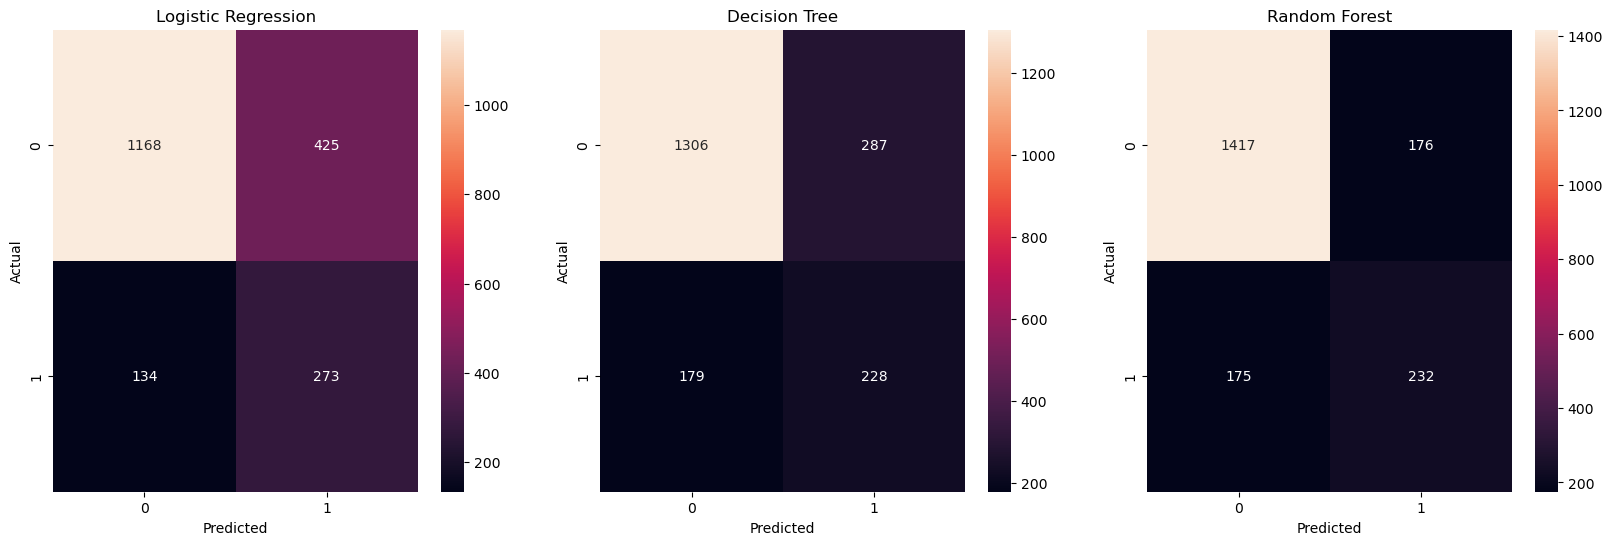

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')


In [ ]:
()